In [1]:
import os
import pandas as pd
folder_path = 'dataset' 
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]
csv_files

['Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv',
 'Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv',
 'Friday-WorkingHours-Morning.pcap_ISCX.csv',
 'Monday-WorkingHours.pcap_ISCX.csv',
 'Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv',
 'Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv',
 'Tuesday-WorkingHours.pcap_ISCX.csv',
 'Wednesday-workingHours.pcap_ISCX.csv']

In [2]:
merged_df = pd.concat([pd.read_csv(os.path.join(folder_path, file)) for file in csv_files], ignore_index=True)
merged_df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830738,53,32215,4,2,112,152,28,28,28.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830739,53,324,2,2,84,362,42,42,42.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830740,58030,82,2,1,31,6,31,0,15.5,21.92031,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830741,53,1048635,6,2,192,256,32,32,32.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [3]:
merged_df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [5]:
set(merged_df[" Label"].values.tolist())

{'BENIGN',
 'Bot',
 'DDoS',
 'DoS GoldenEye',
 'DoS Hulk',
 'DoS Slowhttptest',
 'DoS slowloris',
 'FTP-Patator',
 'Heartbleed',
 'Infiltration',
 'PortScan',
 'SSH-Patator',
 'Web Attack � Brute Force',
 'Web Attack � Sql Injection',
 'Web Attack � XSS'}

In [4]:
merged_df[' Label'] = merged_df[' Label'].apply(lambda x: 0 if str(x).strip() == 'BENIGN' else 1)
print(merged_df[[' Label']].value_counts())

 Label
0         2273097
1          557646
Name: count, dtype: int64


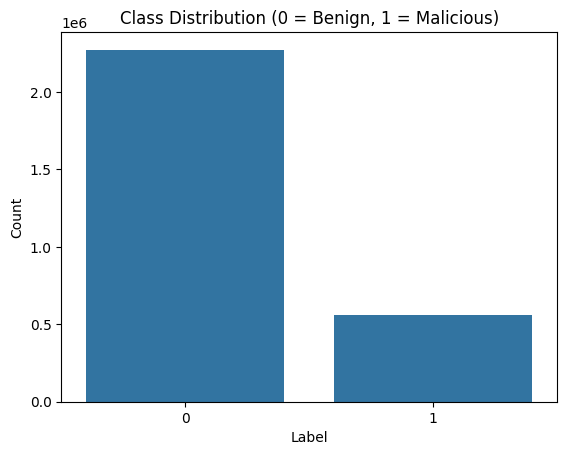

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=merged_df, x=' Label')
plt.title("Class Distribution (0 = Benign, 1 = Malicious)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

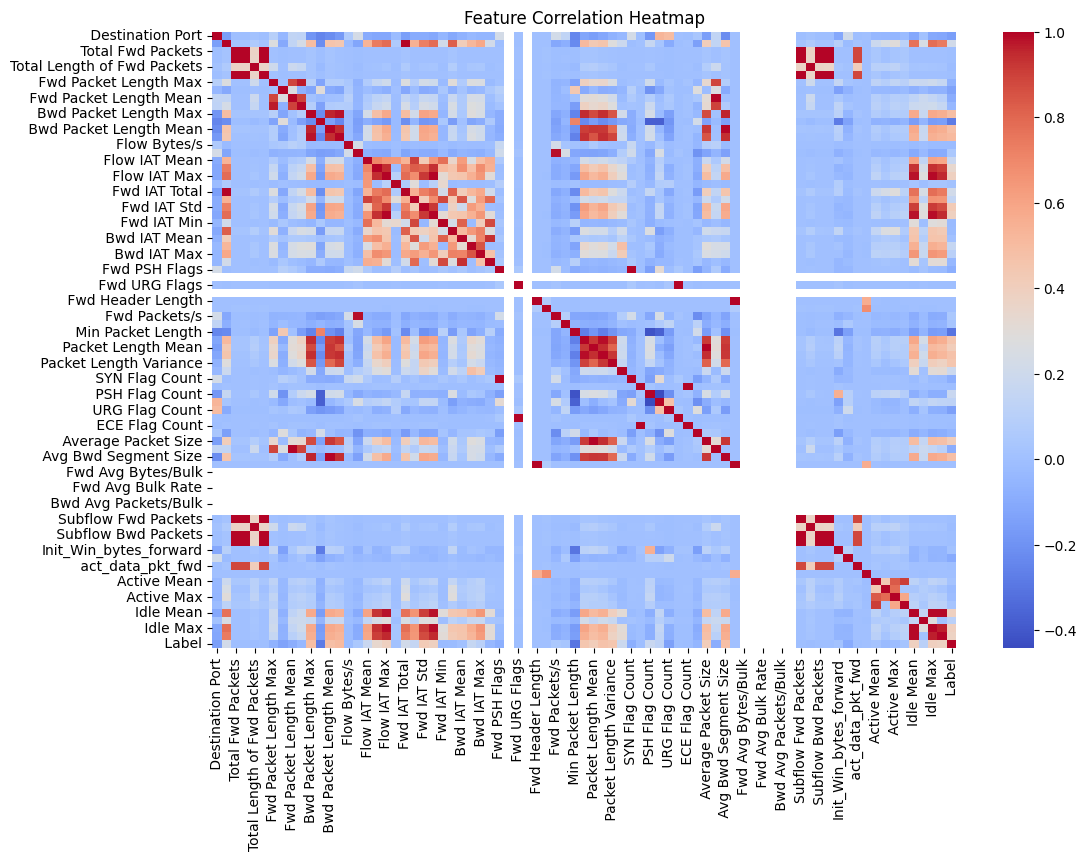

In [6]:
corr = merged_df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

In [8]:
merged_df.isna().sum()

Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
Idle Std                       0
Idle Max                       0
Idle Min                       0
Label                          0
Length: 79, dtype: int64

In [12]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
merged_df.columns = merged_df.columns.str.strip()
X = merged_df.drop('Label', axis=1)
y = merged_df['Label']
X.replace([np.inf, -np.inf], np.nan, inplace=True)

In [13]:
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
df_normalized = pd.concat([X_scaled, y.reset_index(drop=True)], axis=1)
df_normalized.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0.837186,1.333333e-07,0.000005,0.000000,9.302326e-07,0.000000e+00,0.000242,0.002581,0.00101,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.840070,1.016667e-06,0.000000,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.00101,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.840085,5.416666e-07,0.000000,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.00101,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.705516,3.916666e-07,0.000000,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.00101,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.837156,1.333333e-07,0.000005,0.000000,9.302326e-07,0.000000e+00,0.000242,0.002581,0.00101,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [15]:
from sklearn.decomposition import PCA
df_normalized.fillna(df_normalized.mean(), inplace=True)
X = df_normalized.drop('Label', axis=1)
y = df_normalized['Label']

pca = PCA(n_components=50)
X_pca_50 = pca.fit_transform(X)
pca_columns = [f'PC{i+1}' for i in range(50)]
df_pca = pd.DataFrame(X_pca_50, columns=pca_columns)
df_pca['Label'] = y.reset_index(drop=True)
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,Label
0,-0.513420,0.693107,0.262485,-0.030813,-0.004361,0.016042,-0.610608,-0.075718,0.028682,0.104096,...,-0.000267,0.000199,-0.000769,0.000454,0.000029,6.992791e-06,-0.000065,2.459939e-07,0.000013,0
1,-0.622684,0.913284,0.539012,-0.542769,0.281299,0.267696,0.072139,-0.030734,-0.074321,0.038209,...,-0.000420,0.000334,-0.001606,0.000986,0.000236,3.860222e-06,0.000077,-1.022311e-05,-0.000039,0
2,-0.622809,0.913419,0.539135,-0.542490,0.281277,0.267765,0.071537,-0.030738,-0.073990,0.037827,...,-0.000453,0.000356,-0.001684,0.001032,0.000245,4.075542e-06,0.000075,-2.537310e-05,-0.000041,0
3,-0.605299,0.883335,0.495708,-0.528058,0.253473,0.199334,0.149366,-0.025586,-0.060702,-0.011847,...,-0.000398,0.000368,-0.001654,0.001022,0.000245,3.537257e-06,0.000071,-4.061893e-05,-0.000046,0
4,-0.513417,0.693102,0.262471,-0.030810,-0.004366,0.016030,-0.610593,-0.075723,0.028677,0.104075,...,-0.000267,0.000199,-0.000769,0.000454,0.000029,6.992558e-06,-0.000065,2.452806e-07,0.000013,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830738,-0.271015,-0.167702,-0.446774,-0.003088,0.055596,0.002362,0.031584,-0.027915,-0.043665,0.063901,...,-0.000813,0.001169,-0.004605,0.003007,0.000765,2.681693e-05,0.001065,-9.593982e-05,-0.000024,0
2830739,-0.262816,-0.167946,-0.446414,-0.005842,0.037806,0.012958,0.038193,-0.043810,-0.041483,0.073751,...,0.000012,-0.000128,0.000124,-0.000077,-0.000132,-5.837407e-06,0.000904,-2.190782e-05,-0.000012,0
2830740,-0.581044,0.919621,0.494264,1.134206,0.075602,0.512461,-0.135234,-0.022600,-0.090121,0.137995,...,-0.000218,0.000271,-0.001273,0.001279,0.000048,8.499439e-07,0.000313,-2.518517e-05,-0.000239,0
2830741,-0.255322,-0.163536,-0.447066,-0.004148,0.050948,0.004063,0.034046,-0.033198,-0.045484,0.068648,...,-0.000912,0.001186,-0.004699,0.002956,0.000234,1.010182e-05,0.001827,-1.075280e-04,-0.000028,0


In [19]:
benign_df = df_pca[df_pca['Label'] == 0].sample(n=50000, random_state=42)
malicious_df = df_pca[df_pca['Label'] == 1].sample(n=10000, random_state=42)
df_balanced = pd.concat([benign_df, malicious_df], ignore_index=True)
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

In [20]:
df_balanced.to_csv('finaldataset.csv', index=False)

In [17]:
import joblib

joblib.dump(scaler, 'minmaxscaler.pkl')

joblib.dump(pca, 'pcamodel.pkl')

['pcamodel.pkl']

In [21]:
benign_df = df_pca[df_pca['Label'] == 0].sample(n=10000, random_state=42)
malicious_df = df_pca[df_pca['Label'] == 1].sample(n=2000, random_state=42)
df_balanced = pd.concat([benign_df, malicious_df], ignore_index=True)
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)
df_balanced.to_csv('test.csv', index=False)